In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. Plan séparateur

In [0]:
def aff_donnees(X,y,bornex,borney,s):
  
  plt.scatter(X[:, 0], X[:, 1], c=y, s=s, cmap='winter');
  plt.xlim(bornex);
  plt.ylim(borney);
  plt.grid()
def borne(x):
  return[np.min(x)-1,np.max(x)+2]

In [0]:
X=np.array([[0,0],[2,2],[2,0],[3,0]])
y=[-1,-1,1,1]


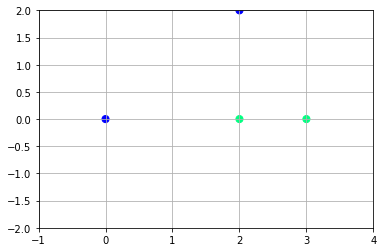

In [121]:
aff_donnees(X,y,borne(X),borne(y),s=50)

In [0]:
def affichePlan(w, b, bornex):

  y=[]
  x = np.linspace(bornex[0],bornex[1])
  for i in range(len(x)):
    y.append(-(w[0]*x[i] + b)/w[1])
  plt.plot(x,y)
  plt.show()


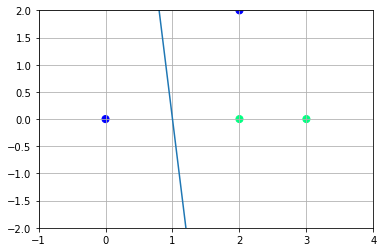

In [135]:
w=[1,0.1]
b=-1
aff_donnees(X,y,borne(X),borne(y),s=50)
affichePlan(w,b,borne(X))
plt.show()

In [0]:
  plt.show()

pas du tout un hyperplan separateur... COmment le faire -> erreur quadratique

# SVM linéaire dans le primal

In [0]:
import cvxopt
def Resoud_primal(X,y):
    N=len(y)
    n=X.shape[1]
    q = cvxopt.matrix(np.zeros((n+1,1)))

    P1=np.concatenate((np.zeros((1,1)),np.zeros((1,n))),axis=1)
    P2=np.concatenate((np.zeros((n,1)),np.eye(n)),axis=1)
    P=np.concatenate((P1,P2),axis=0)
    P=cvxopt.matrix(P)

    for i in range(N):
        g=np.concatenate((np.reshape(-y[i],(1,1)), np.reshape(-y[i]*X[i][:],(1,2))),axis=1)
        if i==0:
            G=g
        else:
            G=np.concatenate((G, g), axis=0)

    G=cvxopt.matrix(G+0.)
    h=-1*np.ones((N,1))
    h=cvxopt.matrix(h)
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(P, q, G, h)
    x=sol['x']
    b=x[0]
    w=x[1:]
    return w,b

In [0]:
w2,b2=Resoud_primal(X,y)

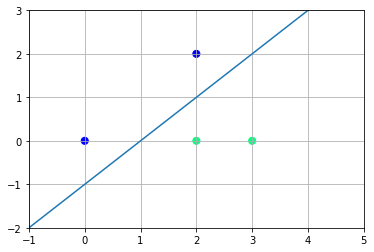

In [149]:
aff_donnees(X,y,borne(X),borne(y),s=50)
affichePlan(w2,b2,borne(X))
plt.show()

hyperplan correct

In [0]:

X2=np.array([[0,0],[2,2],[2,0],[3,0],[2.1,2.5]])
y2=[-1,-1,1,1,1]

In [0]:
w2,b2=Resoud_primal(X2,y2)

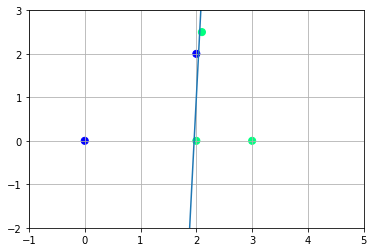

In [165]:
aff_donnees(X2,y2,borne(X2),borne(y2),s=50)
affichePlan(w2,b2,borne(X))
plt.show()

deuxieme point plante car le solveur n'arrive pas a trouver de solution (non lineairement separable)

svm marge souple

In [0]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1)
model.fit(X2, y2) 
w = model.coef_[0] 
b = model.intercept_[0]


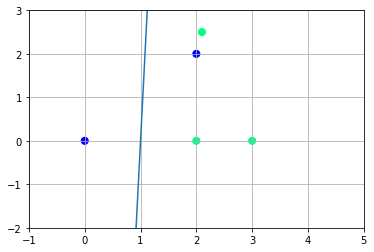

In [178]:
aff_donnees(X2,y2,borne(X2),borne(y2),s=50)
affichePlan(w,b,borne(X))
plt.show()

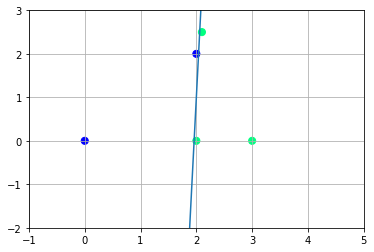

In [181]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=10000)
model.fit(X2, y2) 
w = model.coef_[0] 
b = model.intercept_[0]
aff_donnees(X2,y2,borne(X2),borne(y2),s=50)
affichePlan(w,b,borne(X))
plt.show()

In [0]:
#petit C on veut que la marge mais respecte pas la contrainte

In [0]:
#Grand C vérification des contraintes au détriment de la marge

#III. SVM à marge souple

In [0]:

def aff_frontiere(X,y,bornex,borney,model):
  aff_donnees(X,y,bornex,borney,50)
  xx, yy = np.meshgrid(np.linspace(bornex[0], bornex[1],50), np.linspace(borney[0], borney[1],50))
  xy = np.concatenate((np.reshape(xx,(xx.shape[0]*xx.shape[1],1)),np.reshape(yy,(yy.shape[0]*yy.shape[1],1))),axis=1)
  P = model.predict(xy)
  aff_donnees(xy,P,bornex,borney,1)

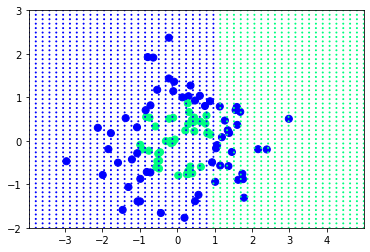

In [187]:
f= np.load('TP6.npz',allow_pickle=True) 
X=f['arr_0']
y=f['arr_1']
model = svm.SVC(kernel='linear', C=1)
model.fit(X2, y2) 
aff_frontiere(X,y,borne(X),borne(y),model)

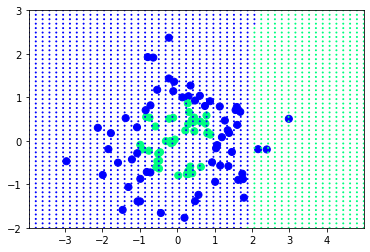

In [188]:
model = svm.SVC(kernel='linear', C=10000)
model.fit(X2, y2) 
aff_frontiere(X,y,borne(X),borne(y),model)

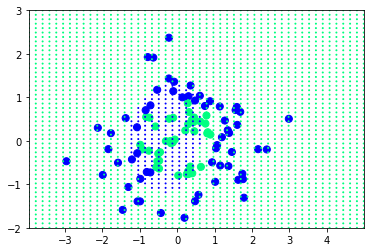

In [199]:
model = svm.SVC(kernel='rbf', C=0.9)
model.fit(X2, y2) 
aff_frontiere(X,y,borne(X),borne(y),model)

noyau lineaire -> droite degueu
Mais ça dépend des cas 

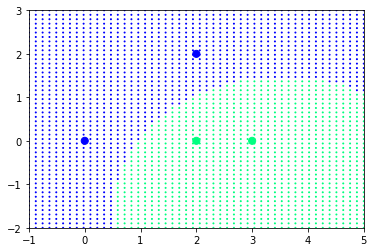

In [202]:
X=np.array([[0,0],[2,2],[2,0],[3,0]])
y=[-1,-1,1,1]
model = svm.SVC(kernel='rbf', C=100, gamma=0.1)
model.fit(X, y) 
aff_frontiere(X,y,borne(X),borne(y),model)

The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

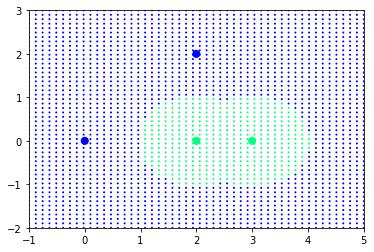

In [203]:
X=np.array([[0,0],[2,2],[2,0],[3,0]])
y=[-1,-1,1,1]
model = svm.SVC(kernel='rbf', C=100, gamma=10)
model.fit(X, y) 
aff_frontiere(X,y,borne(X),borne(y),model)